Hierarchical clustering là hướng tiếp cận bottom-up. Theo Wikipedia (http://en.wikipedia.org/wiki/Hierarchical_clustering), khởi đầu mỗi dữ liệu quan sát chính là một nhóm. Sau đó, các dữ liệu này gom nhóm lại với nhau khi lên một cấp trong hierarchical. Nghĩa là ta sẽ tìm hai điểm gần nhau nhất và gom chúng lại thành một nhóm. Cứ như thế, ta lại tiếp tục tìm hai điểm gần nhau nhất và gom chúng lại thành một nhóm cho đến khi thỏa điều kiện dừng (tùy theo bài toán của chúng ta, điều kiện dừng có thể là giới hạn khoảng cách gom nhóm (distance criterion) hay giới hạn số lượng gom nhóm (number criterion)).

Clustering gom nhóm các điểm dữ liệu gần nhau thành một nhóm. Câu hỏi đặt ra là "thế nào là hai điểm gần nhau?", "làm thế nào để gom nhóm?", và "diễn giải ý nghĩa kết quả gom nhóm như thế nào?". Cluster analysis là một chủ đề quan trọng trong phân tích dữ liệu.
<blockquote>
<p class="p1"><strong>Strengths:</strong> điểm mạnh của hướng tiếp cận này là không giả định dữ liệu đang ở dạng hình cầu, đồng thời có thể scale ở tập dữ liệu lớn.</p>
<p class="p1"><strong>Weaknesses:</strong> cũng như K-Means, ta phải xác định được số lượng clusters (level hierarchy ta cần giữ lại khi thuật toán dừng).</p>
</blockquote>
Để minh hoạ ý tưởng trên, chúng ta hãy tạo các điểm ngẫu nhiên. Sau đó, ta sẽ sử dụng kĩ thuật hierarchical clustering để gom nhóm các điểm dữ liệu này.


In [1]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
set.seed(1234);
x <- rnorm(12,mean=rep(1:3,each=4),sd=0.2)
y <- rnorm(12,mean=rep(c(1,2,1),each=4),sd=0.2)

dataFrame <- data.frame(x=x,y=y)
dataMatrix <- as.matrix(dataFrame)

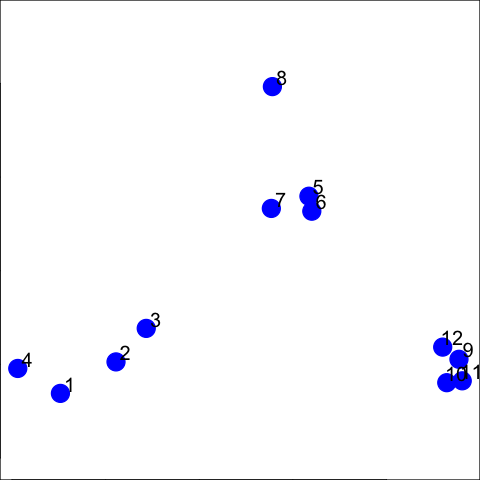

In [3]:
par(mar=c(0,0,0,0))
plot(x,y,col="blue",pch=19,cex=2,asp=1)
text(x+0.05,y+0.05,labels=as.character(1:12))

Đầu tiên, thế nào là hai điểm gần nhau? Ta cần một độ đo khoảng cách để xác định hai điểm có gần nhau hay không? Như biểu đồ trên, ta sẽ gom nhóm hai điểm 5 và 6 trước vì hai điểm này có khoảng cách gần nhau nhất. Ta biết được điều này là nhờ sử dụng khoảng cách Euclidean.

Cho hai điểm (x1, y1) và (x2, y2) trong mặt phẳng hai chiều, khoảng cách Euclidean được tính bằng cách lấy căn bậc hai tổng của bình phương hiệu khoảng cách (x1-x2) và (y1-y2). Khoảng cách này dựa trên định lý Pythagorean trong tam giác vuông.

Một độ đo khoảng cách khác là Manhattan, ta lấy ví dụ khoảng cách di chuyển của xe hơi trong thành phố như hình bên dưới.

Nếu ta muốn di chuyển từ điểm dưới bên trái đến điểm trên bên phải thì khoảng cách ngắn nhất là khoảng cách Euclidean (đường màu xanh lá cây). Nhưng ta không thể di chuyển theo đường chim bay mà phải đi theo các đường màu xám. Vì vậy, ta chỉ có thể đi theo các đường như đỏ, xanh, và vàng. Các đường đi này đều có độ dài là 12. Khoảng cách Manhattan được tính bởi tổng của sai biệt hai điểm (x1, y1) và (x2, y2) là |x1-x2| + |y1-y2|.

Để tính khoảng cách giữa các điểm ta có thể dùng hàm dist()


In [4]:
dist(dataFrame)

            1          2          3          4          5          6          7
2  0.34120511                                                                  
3  0.57493739 0.24102750                                                       
4  0.26381786 0.52578819 0.71861759                                            
5  1.69424700 1.35818182 1.11952883 1.80666768                                 
6  1.65812902 1.31960442 1.08338841 1.78081321 0.08150268                      
7  1.49823399 1.16620981 0.92568723 1.60131659 0.21110433 0.21666557           
8  1.99149025 1.69093111 1.45648906 2.02849490 0.61704200 0.69791931 0.65062566
9  2.13629539 1.83167669 1.67835968 2.35675598 1.18349654 1.11500116 1.28582631
10 2.06419586 1.76999236 1.63109790 2.29239480 1.23847877 1.16550201 1.32063059
11 2.14702468 1.85183204 1.71074417 2.37461984 1.28153948 1.21077373 1.37369662
12 2.05664233 1.74662555 1.58658782 2.27232243 1.07700974 1.00777231 1.17740375
            8          9         10     

Kết quả trên cho ta biết khoảng cách giữa các điểm trong tập dữ liệu dataFrame. Mỗi ô trong ma trận nửa dưới (i, j) tương ứng với khoảng cách giữa hai điểm i và j. Do khoảng cách giữa các điểm là ma trận đối xứng nên R chỉ trả về cho ta ma trận nửa dưới.

Quan sát ma trận trên, ta thấy khoảng cách ngắn nhất là 0.0815 là khoảng cách giữa hai điểm 5 và 6. Do đó, ta có thể gom nhóm hai điểm 5 và 6 lại với nhau. Tương tự, hai điểm 10 và 11 có khoảng cách ngắn tiếp theo, ta có thể gom chúng vào một nhóm. Tiếp tục như vậy cho đến khi ta có dedogram biểu diễn hierarchical clustering như sau:


In [5]:
distxy <- dist(dataFrame)
hClustering <- hclust(distxy)

# thông tin biến hClustering
hClustering


Call:
hclust(d = distxy)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 12 


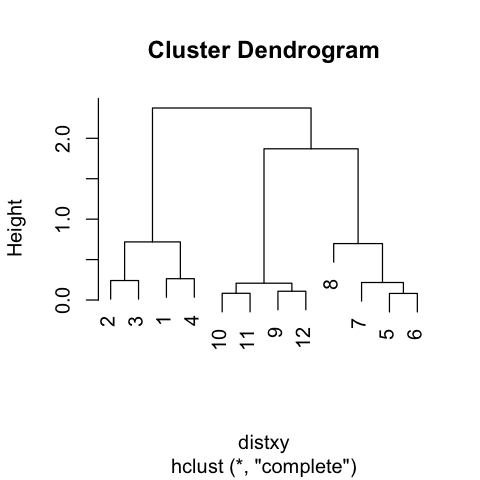

In [6]:
# xuất biểu đồ hClustering
plot(hClustering)

Ta có thể sử dụng hàm as.đenogram() để thay đổi giá trị đối số truyền vào hàm plot(), nhờ vậy mà ta có biểu đồ hierarchical clustering gọn gàng hơn:


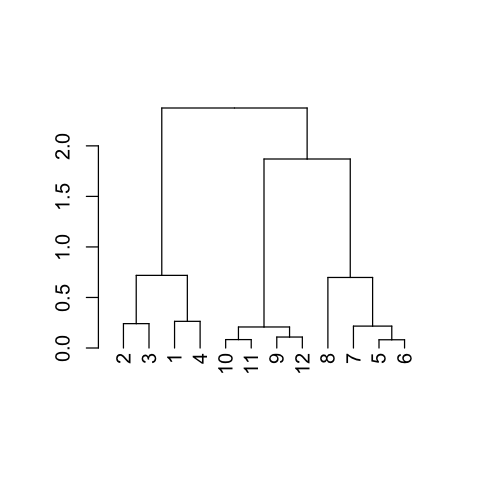

In [7]:
plot(as.dendrogram(hClustering))

Điểm khác biệt so với biểu đồ trước đó là các tiêu đề đều bị lược bỏ và các điểm dữ liệu được sắp trên cùng một hàng với nhau. Lưu ý, trục tung bên tay trái cho ta biết thông tin về khoảng cách. Ta dùng hàm abline() để kẻ đường thẳng ngang qua giá trị 1.5 như sau:


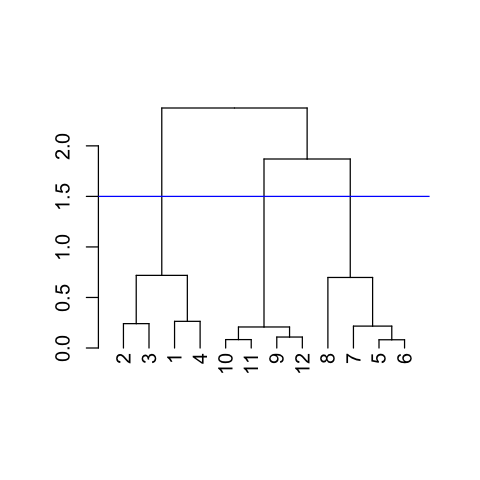

In [8]:
plot(as.dendrogram(hClustering))
abline(h=1.5,col="blue")

Ta thấy rằng đường thẳng này cắt các đường thẳng đứng qua 3 điểm. Điều này có nghĩa khi ta lấy ngưỡng khoảng cách là 1.5 thì ta sẽ được 3 nhóm (1 đến 4), (9 đến 12), và (5 đến 8). Như vậy, số nhóm gom được phụ thuộc vào việc ta kẻ đường thẳng ở mức nào.

Ngoài ra, ta còn có thể dùng heatmap để quan sát hierarchical clustering được rõ hơn:


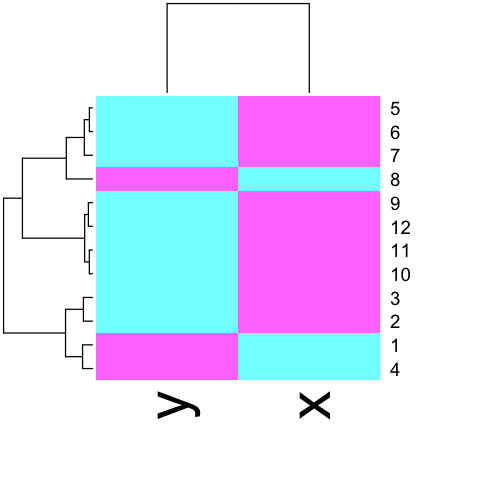

In [9]:
heatmap(dataMatrix,col=cm.colors(25))

Các dòng và cột ở biểu đồ trên được gom nhóm và biểu thị bằng màu sắc. Dòng trên cùng gồm các phần tử cùng một nhóm (5, 6, 7) được biểu thị chung một màu. Tương tự như vậy với các dòng tiếp theo, ta có biểu đồ gom nhóm ứng với biểu đồ hierarchical clustering trước đó.

Qua bài viết trên, ta đã biết cách sử dụng hierarchical clustering cho việc quan sát mối quan hệ giữa các điểm trong tập dữ liệu ban đầu. Để làm được điều này ta cần xác định khoảng cách (euclidean, manhattan) giữa hai điểm. Sau đó, số nhóm gom được phụ thuộc bởi giá trị khoảng cách mà ta lấy ngưỡng.

<strong>Nguồn tham khảo:</strong> <a href="http://swirlstats.com/" target="_blank" rel="noopener">http://swirlstats.com/</a>